In [1]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import numpy as np

In [2]:
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data["totalScore"] = data["math score"] + data["reading score"] + data["writing score"]

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [5]:
dummy_testpreparationcourse = pd.get_dummies(data["test preparation course"], prefix="testpreparation")
dummy_race = pd.get_dummies(data["race/ethnicity"], prefix="race")
dummy_parentallevelofeduc = pd.get_dummies(data["parental level of education"], prefix="parentallevel")
dummy_lunch = pd.get_dummies(data["lunch"], prefix="lunch")
dummy_gender = pd.get_dummies(data["gender"], prefix="gender")

In [6]:
dummy_gender.head()

,gender_female,gender_male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [7]:
columns_names = data.columns.values.tolist()
columns_names

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'totalScore']

In [8]:
data_new = data[columns_names].join(dummy_testpreparationcourse)
data_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalScore,testpreparation_completed,testpreparation_none
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0,1
1,female,group C,some college,standard,completed,69,90,88,247,1,0
2,female,group B,master's degree,standard,none,90,95,93,278,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0,1
4,male,group C,some college,standard,none,76,78,75,229,0,1


In [9]:
columns_names = data_new.columns.values.tolist()
columns_names

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'totalScore',
 'testpreparation_completed',
 'testpreparation_none']

In [10]:
data_new = data_new[columns_names].join(dummy_race)
data_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalScore,testpreparation_completed,testpreparation_none,race_group A,race_group B,race_group C,race_group D,race_group E
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0,1,0,1,0,0,0
1,female,group C,some college,standard,completed,69,90,88,247,1,0,0,0,1,0,0
2,female,group B,master's degree,standard,none,90,95,93,278,0,1,0,1,0,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0,1,1,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,229,0,1,0,0,1,0,0


In [11]:
columns_names = data_new.columns.values.tolist()
columns_names

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'totalScore',
 'testpreparation_completed',
 'testpreparation_none',
 'race_group A',
 'race_group B',
 'race_group C',
 'race_group D',
 'race_group E']

In [12]:
data_new = data_new[columns_names].join(dummy_parentallevelofeduc)
data_new.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalScore,testpreparation_completed,...,race_group B,race_group C,race_group D,race_group E,parentallevel_associate's degree,parentallevel_bachelor's degree,parentallevel_high school,parentallevel_master's degree,parentallevel_some college,parentallevel_some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0,...,1,0,0,0,0,1,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,247,1,...,0,1,0,0,0,0,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,278,0,...,1,0,0,0,0,0,0,1,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0,...,0,0,0,0,1,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,229,0,...,0,1,0,0,0,0,0,0,1,0


In [13]:
columns_names = data_new.columns.values.tolist()
columns_names

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'totalScore',
 'testpreparation_completed',
 'testpreparation_none',
 'race_group A',
 'race_group B',
 'race_group C',
 'race_group D',
 'race_group E',
 "parentallevel_associate's degree",
 "parentallevel_bachelor's degree",
 'parentallevel_high school',
 "parentallevel_master's degree",
 'parentallevel_some college',
 'parentallevel_some high school']

In [14]:
data_new = data_new[columns_names].join(dummy_lunch)
data_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalScore,testpreparation_completed,...,race_group D,race_group E,parentallevel_associate's degree,parentallevel_bachelor's degree,parentallevel_high school,parentallevel_master's degree,parentallevel_some college,parentallevel_some high school,lunch_free/reduced,lunch_standard
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0,...,0,0,0,1,0,0,0,0,0,1
1,female,group C,some college,standard,completed,69,90,88,247,1,...,0,0,0,0,0,0,1,0,0,1
2,female,group B,master's degree,standard,none,90,95,93,278,0,...,0,0,0,0,0,1,0,0,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0,...,0,0,1,0,0,0,0,0,1,0
4,male,group C,some college,standard,none,76,78,75,229,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
columns_names = data_new.columns.values.tolist()
columns_names

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'totalScore',
 'testpreparation_completed',
 'testpreparation_none',
 'race_group A',
 'race_group B',
 'race_group C',
 'race_group D',
 'race_group E',
 "parentallevel_associate's degree",
 "parentallevel_bachelor's degree",
 'parentallevel_high school',
 "parentallevel_master's degree",
 'parentallevel_some college',
 'parentallevel_some high school',
 'lunch_free/reduced',
 'lunch_standard']

In [16]:
data_new = data_new[columns_names].join(dummy_gender)
data_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalScore,testpreparation_completed,...,parentallevel_associate's degree,parentallevel_bachelor's degree,parentallevel_high school,parentallevel_master's degree,parentallevel_some college,parentallevel_some high school,lunch_free/reduced,lunch_standard,gender_female,gender_male
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0,...,0,1,0,0,0,0,0,1,1,0
1,female,group C,some college,standard,completed,69,90,88,247,1,...,0,0,0,0,1,0,0,1,1,0
2,female,group B,master's degree,standard,none,90,95,93,278,0,...,0,0,0,1,0,0,0,1,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0,...,1,0,0,0,0,0,1,0,0,1
4,male,group C,some college,standard,none,76,78,75,229,0,...,0,0,0,0,1,0,0,1,0,1


In [17]:
columns_names = data_new.columns.values.tolist()
columns_names

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'totalScore',
 'testpreparation_completed',
 'testpreparation_none',
 'race_group A',
 'race_group B',
 'race_group C',
 'race_group D',
 'race_group E',
 "parentallevel_associate's degree",
 "parentallevel_bachelor's degree",
 'parentallevel_high school',
 "parentallevel_master's degree",
 'parentallevel_some college',
 'parentallevel_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'gender_female',
 'gender_male']

In [18]:
variablesPredictoras = ["testpreparation_completed","testpreparation_none","race_group A","race_group B","race_group C","race_group D","race_group E","parentallevel_associate's degree","parentallevel_bachelor's degree","parentallevel_high school","parentallevel_master's degree","parentallevel_some college","lunch_free/reduced","lunch_standard","gender_female","gender_male"]

In [19]:
X = data_new[variablesPredictoras]
Y = data_new["totalScore"]

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lm.score(X,Y)

0.2421379102773692

In [23]:
import matplotlib.pyplot as plt

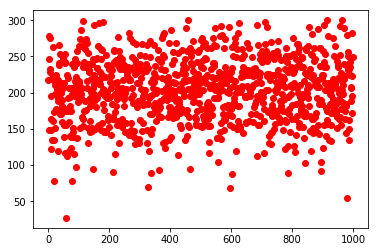

In [31]:
%matplotlib inline
plt.plot(Y,"ro")
